In [73]:
# The Notebook contains Stats FUnctions and how to interpret 

import pandas as pd
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

In [33]:
# 1. Dataset Load 
SourceDF=pd.read_csv('leetcode.csv')
#2 . Classification Target where I consider >0.50 acceptance as 1 and less as zero 
SourceDF['Target_acceptance']=SourceDF['acceptance'].apply(lambda x : 1 if x >50 else 0)

In [86]:
SourceDF.dtypes

id                        int64
page_number               int64
is_premium                 bool
title                    object
problem_description      object
topic_tags               object
difficulty               object
similar_questions        object
no_similar_questions    float64
acceptance              float64
accepted                float64
submission              float64
solution                float64
discussion_count        float64
likes                   float64
dislikes                float64
problem_URL              object
solution_URL             object
Target_acceptance         int64
dtype: object

['id',
 'page_number',
 'no_similar_questions',
 'acceptance',
 'accepted',
 'submission',
 'solution',
 'discussion_count',
 'likes',
 'dislikes',
 'Target_acceptance']

In [35]:
# Stats Test (Source Kaggle)


# Theory
# What we will be trying to do in this tutorial is make assumptions on the whole population of Leetcode Questions based only on 
# the samples at our disposal.
# This is what statistical tests do, but one must know a few principles before using them.


# The process¶
# The basic process of statistical tests is the following :

# Stating a Null Hypothesis (most often : "the two values are not different")
# Stating an Alternative Hypothesis (most often : "the two values are different")
# Defining an alpha value, which is a confidence level (most often : 95%). The higher it is, the harder it will be to validate the Alternative Hypothesis, but the more confident we will be if we do validate it.
# Depending on data at disposal, we choose the relevant test (Z-test, T-test, etc.)
# The test computes a score, which corresponds to a p-value.
# If p-value is below 1-alpha (0.05 if alpha is 95%), we can accept the Alternative Hypothesis (or "reject the Null Hypothesis"). If it is over, we'll have to stick with the Null Hypothesis (or "fail to reject the Null Hypothesis").
# There's a built-in function for most statistical tests out there.
# Let's also build our own function to summarize all the information.
# All tests we will conduct from now on are based on alpha = 95%.

In [36]:
# Functions
def results(p):
    if(p['p_value']<0.05):p['hypothesis_accepted'] = 'alternative'
    if(p['p_value']>=0.05):p['hypothesis_accepted'] = 'null'

    df = pd.DataFrame(p, index=[''])
    cols = ['value1', 'value2', 'score', 'p_value', 'hypothesis_accepted']
    return df[cols]

In [37]:
# Types of tests
# There are different types of tests, here are the ones we will cover :

# T-tests. Used for small sample sizes (n<30), and when population's standard deviation is unknown.
# Z-tests. Used for large sample sizes (n=>30), and when population's standard deviation is known.
# F-tests. Used for comparing values of more than two variables.
# Chi-square. Used for comparing categorical data.

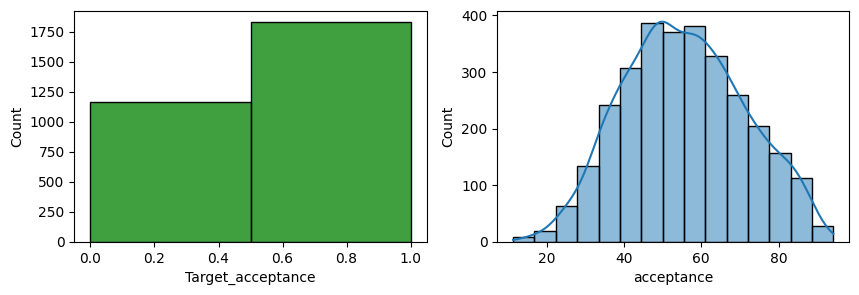

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
sns.histplot(SourceDF['Target_acceptance'],bins=2,color='green',ax=ax1)
sns.histplot(SourceDF['acceptance'],kde=True,bins=15,ax=ax2)

plt.show()

In [ ]:
# T test 

# Both the t-test and the z-test are statistical methods used to determine if there is a significant difference between the means of two groups. 
# The choice between a t-test and a z-test depends on certain conditions, such as the sample size and whether the population standard deviation is known. Here's a guide on how to use each test:

# T-Test
# When to use:

# When the sample size is small (typically less than 30).
# When the population standard deviation is unknown.
# When the data is approximately normally distributed.

In [ ]:
# For the test statistic t:
# t = (X̄₁ - X̄₂) / √(s₁²/n₁ + s₂²/n₂)

# Where:
# - X̄₁ and X̄₂ are the sample means of the two groups,
# - s₁² and s₂² are the sample variances of the two groups,
# - n₁ and n₂ are the sample sizes of the two groups.

# For the degrees of freedom (df):
# df = [(s₁²/n₁ + s₂²/n₂)²] / [(s₁⁴/(n₁² * (n₁ - 1))) + (s₂⁴/(n₂² * (n₂ - 1)))]


In [74]:
# Original Code [in case you want to use it ] - Source GPT 

import numpy as np

def calculate_t_statistic(sample1, sample2):
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    var1 = np.var(sample1, ddof=1)  # Using ddof=1 for unbiased estimation of variance
    var2 = np.var(sample2, ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)
    
    pooled_std = np.sqrt(var1/n1 + var2/n2)
    t_statistic = (mean1 - mean2) / pooled_std
    return t_statistic

def calculate_degrees_of_freedom(sample1, sample2):
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)
    
    numerator = (var1/n1 + var2/n2)**2
    denominator = (var1**2 / (n1 - 1)) + (var2**2 / (n2 - 1))
    degrees_of_freedom = numerator / denominator
    return degrees_of_freedom

# # Example usage:
# sample1 = [1, 2, 3, 4, 5]
# sample2 = [6, 7, 8, 9, 10]

# t_statistic = calculate_t_statistic(sample1, sample2)
# degrees_of_freedom = calculate_degrees_of_freedom(sample1, sample2)

# print("T-statistic:", t_statistic)
# print("Degrees of freedom:", degrees_of_freedom)


T-statistic: -5.0
Degrees of freedom: 0.32


['id',
 'page_number',
 'no_similar_questions',
 'acceptance',
 'accepted',
 'submission',
 'solution',
 'discussion_count',
 'likes',
 'dislikes',
 'Target_acceptance']

In [112]:
# Test 1 : T test , difference for class 0 and class 1 

def TTest_BInaClassifications(class_A_data,class_B_data):
    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(class_A_data, class_B_data)

    # print("T-statistic:", t_statistic)
    # print("P-value:", p_value)

    return t_statistic,p_value



In [118]:
TestDataFrame = pd.DataFrame(columns=('Column','TestType','TestStats','PValue','Hypothesis'))
TestDataFrame                       
# for columns  in  numericalattribute:

# TTest_BInaClassifications(class_A_data,class_B_data)

,Column,TestType,TestStats,PValue,Hypothesis


In [164]:
def AllStatsTests(testType,Target,Allcolumns):
    TestDataFrame = pd.DataFrame(columns=('Column','TestType','TestStats','PValue','DOF','Hypothesis'))
    testType='ttest'
    Allcolumns.remove(Target)
    for columns  in  Allcolumns:
        class_A_data=SourceDF[SourceDF[Target]==1][columns][:30]
        class_B_data=SourceDF[SourceDF[Target]==0][columns][:30]

        tempdf=pd.DataFrame(columns=('Column','TestType','TestStats','PValue','DOF','Hypothesis'))
        tempdf['Column']=[columns]
        tempdf['TestType']=testType


        if testType=='ttest':
            t_statistic,p_value=TTest_BInaClassifications(class_A_data,class_B_data)
            tempdf['TestStats']=t_statistic
            tempdf['PValue']=p_value 
            if p_value<0.05:
                tempdf['Hypothesis']='Alternate'
            else:
                tempdf['Hypothesis']='Null'

        

        # Calculate degrees of freedom manually
        n1 = len(class_A_data)
        n2 = len(class_B_data)
        degrees_of_freedom = n1 + n2 - 2  # For independent t-test
        tempdf['DOF']=degrees_of_freedom
        TestDataFrame=pd.concat((TestDataFrame, tempdf), axis = 0)   
    return   TestDataFrame
        

In [165]:
numericalattribute=[]
datatypelist=('float64','int64')
for i in SourceDF.columns:
    tdtype=(SourceDF[i].dtype)
    if tdtype in datatypelist:  
        numericalattribute.append(i)
numericalattribute

pd.concat(AllStatsTests('ttest','Target_acceptance',numericalattribute),
          AllStatsTests('Ztest','Target_acceptance',numericalattribute)

,Column,TestType,TestStats,PValue,DOF,Hypothesis
0,id,ttest,-0.587469,0.556933,2998,Null
0,page_number,ttest,-0.609737,0.542082,2998,Null
0,no_similar_questions,ttest,NaN,NaN,2998,Null
0,acceptance,ttest,72.173333,0.000000,2998,Alternate
0,accepted,ttest,NaN,NaN,2998,Null
0,submission,ttest,NaN,NaN,2998,Null
0,solution,ttest,NaN,NaN,2998,Null
0,discussion_count,ttest,NaN,NaN,2998,Null
0,likes,ttest,NaN,NaN,2998,Null
0,dislikes,ttest,NaN,NaN,2998,Null


In [166]:
# Example data for two groups
success_A = 20  # Number of successes in group A
success_B = 35  # Number of successes in group B
total_A = 100    # Total number of observations in group A
total_B = 120    # Total number of observations in group B

# Perform Z-test for proportions
count = np.array([success_A, success_B])
nobs = np.array([total_A, total_B])

# Alternative hypothesis: two-sided (default)
# Null hypothesis: proportion of successes in group A is equal to the proportion of successes in group B
z_stat, p_value = proportions_ztest(count, nobs)

print("Z-statistic:", z_stat)
print("P-value:", p_value)
